In [1]:
!pip install easyocr

     |████████████████████████████████| 62.3 MB 342 kB/s eta 0:00:01     |██████▎                         | 12.3 MB 722 kB/s eta 0:01:10     |███████████                     | 21.5 MB 152 kB/s eta 0:04:28     |████████████████████▊           | 40.3 MB 181 kB/s eta 0:02:02     |█████████████████████████████▏  | 56.7 MB 262 kB/s eta 0:00:22


In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image

In [3]:
rcParams['figure.figsize'] = 8, 16

### 2 Parts:
1. detection model
2. recognition model

In [4]:
reader = easyocr.Reader(['en', 'hi'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
file_name = "Image.jpg"

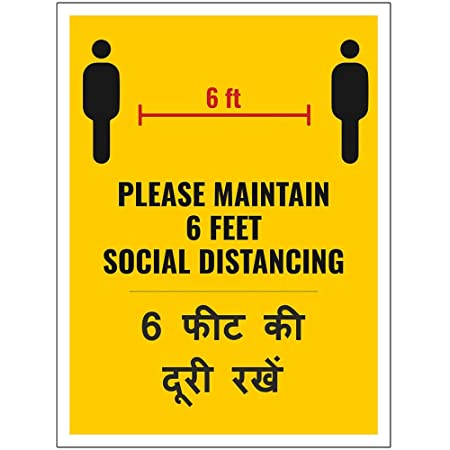

In [39]:
Image(file_name)

In [40]:
output = reader.readtext(file_name)

In [41]:
output

[([[202, 84], [248, 84], [248, 112], [202, 112]], '6 ft', 0.44906866550445557),
 ([[113, 176], [335, 176], [335, 213], [113, 213]],
  'PLEASE MAINTAIN',
  0.5476829409599304),
 ([[181, 211], [267, 211], [267, 247], [181, 247]],
  '6 FEET',
  0.860344648361206),
 ([[99, 243], [351, 243], [351, 281], [99, 281]],
  'SOCIAL DISTANGING',
  0.3316938877105713),
 ([[134, 298], [310, 298], [310, 346], [134, 346]],
  '६ फीट की',
  0.0918676033616066),
 ([[225, 353], [285, 353], [285, 397], [225, 397]],
  'रखें',
  0.4987160265445709)]

In [42]:
len(output) #no. of items detected

6

## find the coords and draw bounding boxes on one of the output detected

In [19]:
cord = output[4][0]

In [20]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

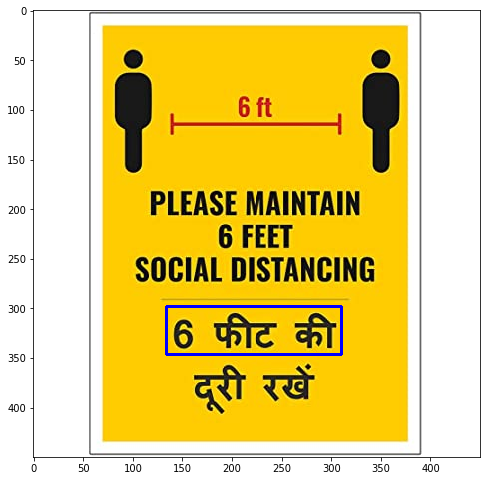

In [21]:

image = cv2.imread(file_name)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(255,0,0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## put a bounding box on all outputs detected

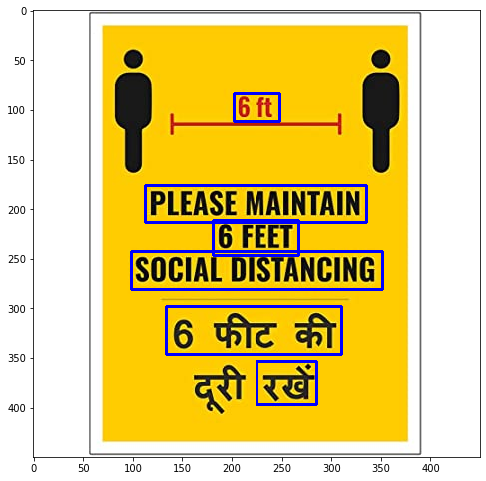

In [22]:
image = cv2.imread(file_name)

for i in range(len(output)):
    cord = output[i][0]
    x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
    x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
    
    
    cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(255,0,0),2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))